# Fores Fires (Regression)
## Data Cleaning, Exploration and Wrangling

### Source
- https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from eda import plot_corr_mat

In [2]:
df = pd.read_csv('lake/forest_fires/forestfires.csv')
print(df.shape)
df.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.20,26.20,94.30,5.10,8.20,51,6.70,0.00,0.00
1,7,4,oct,tue,90.60,35.40,669.10,6.70,18.00,33,0.90,0.00,0.00
2,7,4,oct,sat,90.60,43.70,686.90,6.70,14.60,33,1.30,0.00,0.00
3,8,6,mar,fri,91.70,33.30,77.50,9.00,8.30,97,4.00,0.20,0.00
4,8,6,mar,sun,89.30,51.30,102.20,9.60,11.40,99,1.80,0.00,0.00


### Types of Features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [5]:
categorical_cols = ['month', 'day']
df[categorical_cols].describe()

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [6]:
numerical_cols = [col for col in df.columns.tolist() if not col in categorical_cols]
df[numerical_cols].describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00,517.00
mean,4.67,4.30,90.64,110.87,547.94,9.02,18.89,44.29,4.02,0.02,12.85
std,2.31,1.23,5.52,64.05,248.07,4.56,5.81,16.32,1.79,0.30,63.66
min,1.00,2.00,18.70,1.10,7.90,0.00,2.20,15.00,0.40,0.00,0.00
25%,3.00,4.00,90.20,68.60,437.70,6.50,15.50,33.00,2.70,0.00,0.00
50%,4.00,4.00,91.60,108.30,664.20,8.40,19.30,42.00,4.00,0.00,0.52
75%,7.00,5.00,92.90,142.40,713.90,10.80,22.80,53.00,4.90,0.00,6.57
max,9.00,9.00,96.20,291.30,860.60,56.10,33.30,100.00,9.40,6.40,"1,090.84"


### Missing Values

In [7]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

No missing values

### Duplicated Values

In [8]:
df[df.duplicated(keep=False)]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
52,4,3,aug,wed,92.10,111.20,654.10,9.60,20.40,42,4.90,0.00,0.00
53,4,3,aug,wed,92.10,111.20,654.10,9.60,20.40,42,4.90,0.00,0.00
99,3,4,aug,sun,91.40,142.40,601.40,10.60,19.80,39,5.40,0.00,0.00
100,3,4,aug,sun,91.40,142.40,601.40,10.60,19.80,39,5.40,0.00,0.00
214,4,4,mar,sat,91.70,35.80,80.80,7.80,17.00,27,4.90,0.00,28.66
215,4,4,mar,sat,91.70,35.80,80.80,7.80,17.00,27,4.90,0.00,28.66
302,3,6,jun,fri,91.10,94.10,232.10,7.10,19.20,38,4.50,0.00,0.00
303,3,6,jun,fri,91.10,94.10,232.10,7.10,19.20,38,4.50,0.00,0.00


In [9]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile

### Target Analysis: Burnt Area

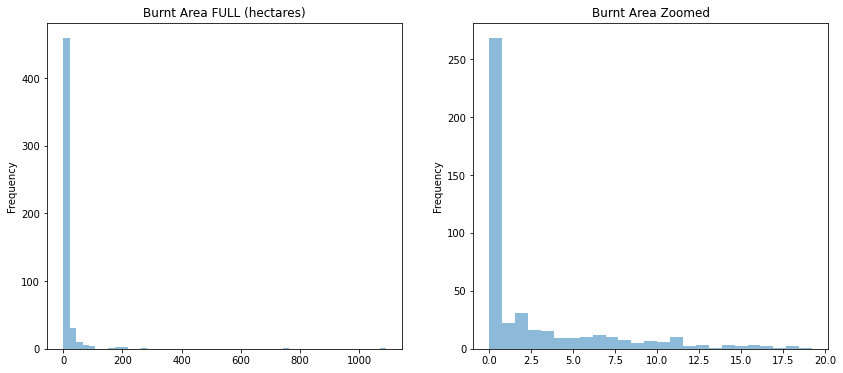

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
df.area.plot.hist(ax = ax1, bins=50, alpha=0.5, title="Burnt Area FULL (hectares)");
df[df.area < 20].area.plot.hist(ax = ax2, bins=25, alpha=0.5, title="Burnt Area Zoomed");

<AxesSubplot:>

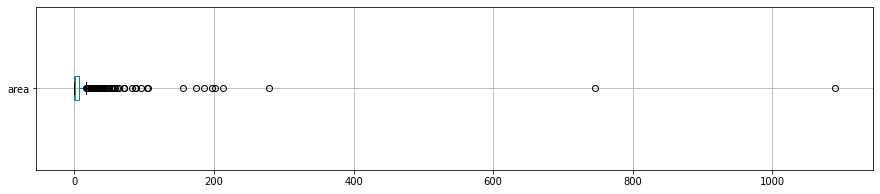

In [11]:
plt.figure(figsize=(15,3))
df.boxplot(column='area', vert=False)

The target variable has significant outliers

### Feature Exploration: Univariate

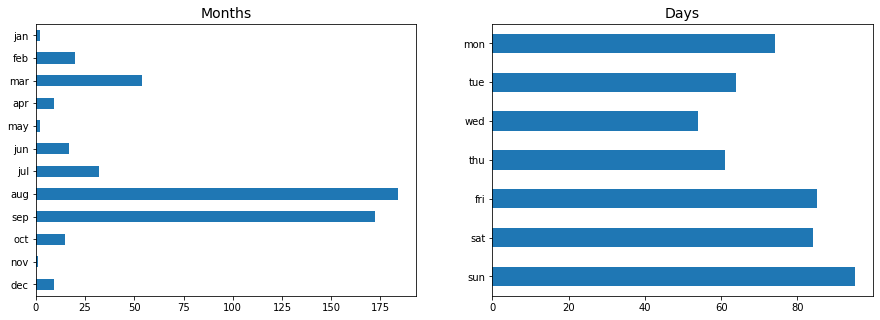

In [12]:
# Month
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df['month'] = pd.Categorical(df['month'], ["jan", "feb", "mar", "apr", "may", "jun",
                                           "jul", "aug", "sep", "oct", "nov", "dec"])
ax = df.month.value_counts(sort=False).sort_index(ascending=False).plot.barh(ax=ax1)
ax.set_title("Months", fontsize=14);

#Day
df['day'] = pd.Categorical(df['day'], ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])
ax = df.day.value_counts(sort=False).sort_index(ascending=False).plot.barh(ax=ax2)
ax.set_title("Days", fontsize=14);

Most of the fires occur in August and September. Apparently fires occured more from Fridat to Monday.

#### Forest Weather Index (FWI)
Is a Canadian system for rating fire danter. It includes six components (Cortez et al).
- Fine Fuel Moisture Code (FFMC): moisture content surface litter and influences ignition and fire spread
- Initial Spread Index (ISI): Fire velocity spread
- Duff Moisture Code (DMC): moisture content of shallow organic layers
- Drought Code (DC): moisture content of deep organic layers

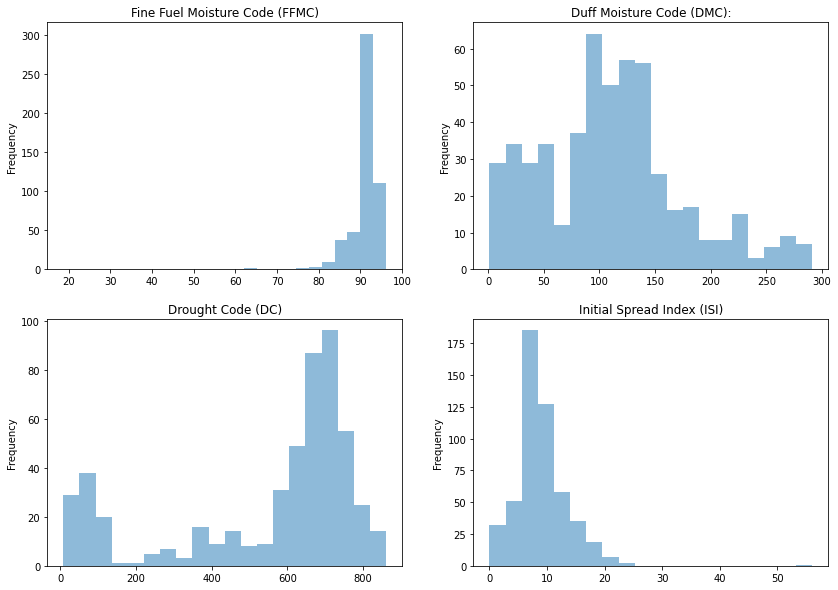

In [13]:
def plot_fwi_indicators(data):
    fig, axes = plt.subplots(2,2, figsize=(14,10))
    data['FFMC'].plot.hist(ax=axes[0,0], bins=25, alpha=0.5, title='Fine Fuel Moisture Code (FFMC)')
    data['DMC'].plot.hist(ax=axes[0,1], bins=20, alpha=0.5, title='Duff Moisture Code (DMC):')
    data['DC'].plot.hist(ax=axes[1,0], bins=20, alpha=0.5, title='Drought Code (DC)');
    data['ISI'].plot.hist(ax=axes[1,1], bins=20, alpha=0.5, title='Initial Spread Index (ISI)');
plot_fwi_indicators(df)

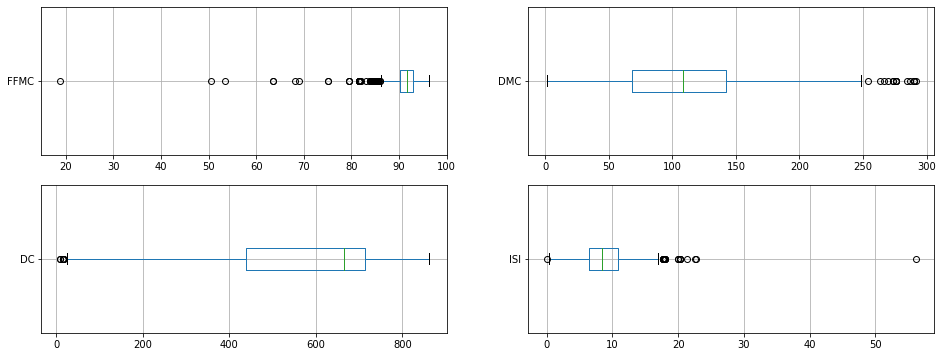

In [14]:
def plot_fwi_indicators_outliers(data):
    fig, axes = plt.subplots(2,2, figsize=(16,6))
    data.boxplot(column='FFMC', ax=axes[0,0], vert=False)
    data.boxplot(column='DMC', ax=axes[0,1], vert=False)
    data.boxplot(column='DC', ax=axes[1,0], vert=False)
    data.boxplot(column='ISI', ax=axes[1,1], vert=False)
plot_fwi_indicators_outliers(df)

FFMC, and ISI have significant outliers

### Weather Indicators
- temp: Temperature (Celcius)
- RH: Relative humidity (%)
- wind (km/h)
- rain (mm/m2)

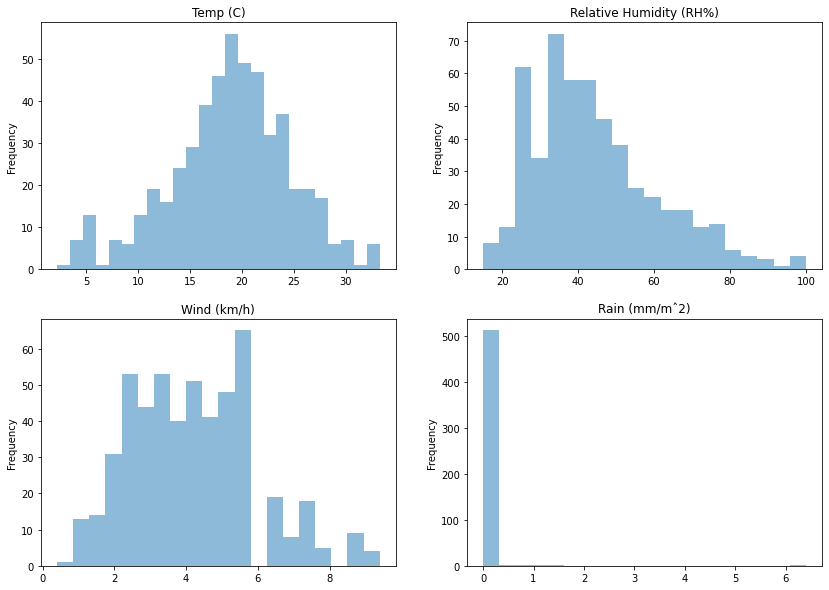

In [15]:
def plot_weather_indicators(data):
    fig, axes = plt.subplots(2,2, figsize=(14,10))
    data['temp'].plot.hist(ax=axes[0,0], bins=25, alpha=0.5, title='Temp (C)')
    data['RH'].plot.hist(ax=axes[0,1], bins=20, alpha=0.5, title='Relative Humidity (RH%)')
    data['wind'].plot.hist(ax=axes[1,0], bins=20, alpha=0.5, title='Wind (km/h)');
    data['rain'].plot.hist(ax=axes[1,1], bins=20, alpha=0.5, title='Rain (mm/mˆ2)');
plot_weather_indicators(df)

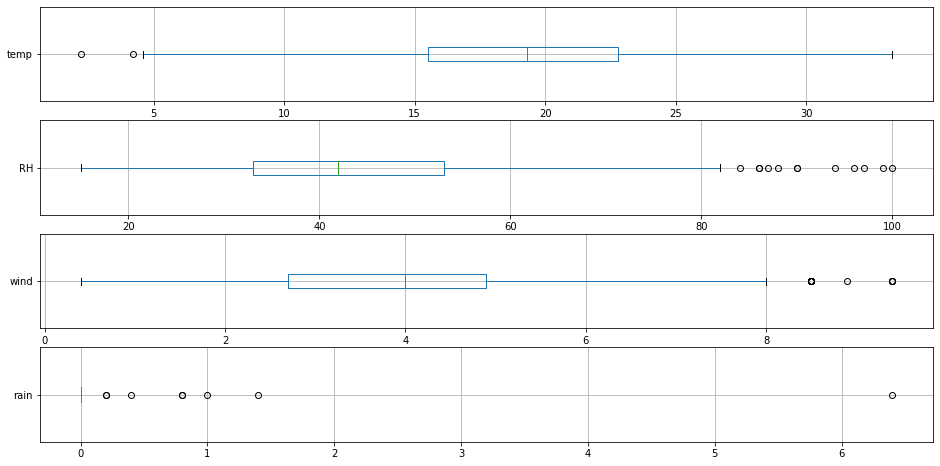

In [16]:
fig, axes = plt.subplots(4, figsize=(16,8))
for index, col_name in enumerate(['temp', 'RH', 'wind', 'rain']): 
    df.boxplot(column=col_name, ax=axes[index], vert=False)

Rain has significant outliers

### Feature Exploration: Bivariate Analysis

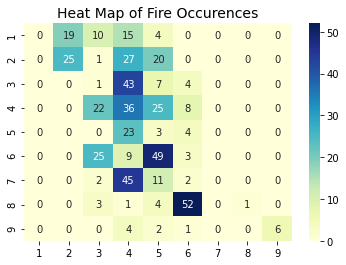

In [17]:
# Coordinates
position = df.groupby(['X', 'Y']).count()['month'].unstack().fillna(0)
position.index.name = None
position.columns.name = None
position = pd.concat([position, pd.DataFrame({1: np.zeros(9), 7:np.zeros(9)},index=position.index)],  axis = 1)
position = position.reindex(sorted(position.columns), axis=1).astype(int)
ax = sns.heatmap(position, annot=True, cmap="YlGnBu")
ax.set_title('Heat Map of Fire Occurences', fontsize='14');

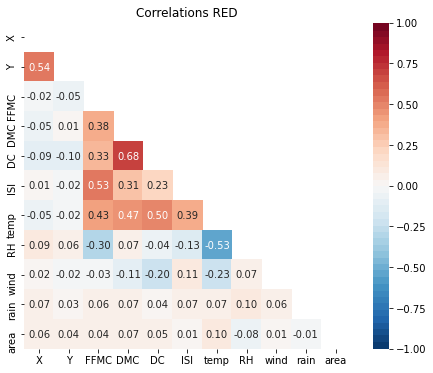

In [18]:
plot_corr_mat(df, "Correlations RED")

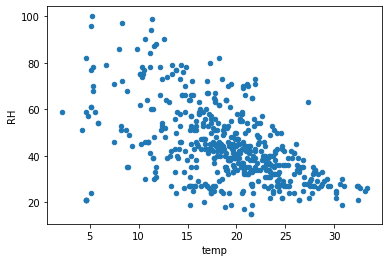

In [19]:
df.plot.scatter(x='temp', y='RH');

### Treating Outliers

In [20]:
def skew_kurt(df):
    return pd.DataFrame({'kurtosis':  df.kurtosis(), 'skewness': df.skew()})
skew_kurt(df)

,kurtosis,skewness
X,-1.17,0.04
Y,1.42,0.42
FFMC,67.07,-6.58
DMC,0.20,0.55
DC,-0.25,-1.10
ISI,21.46,2.54
temp,0.14,-0.33
RH,0.44,0.86
wind,0.05,0.57
rain,421.30,19.82


In [21]:
# Check distributions in log space
outlier_columns = ['area', 'FFMC', 'ISI', 'rain']
skew_kurt(np.log1p(df[outlier_columns]))

,kurtosis,skewness
area,0.95,1.22
FFMC,185.48,-11.68
ISI,2.58,-0.94
rain,234.24,14.17


FFMC still has large kurtosis and skewness.

In [22]:
def remove_outliers_iqr(df, column):
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(lower_bound <= df[column]) & (df[column] <= upper_bound)]

In [23]:
print(df.shape)
print(remove_outliers_iqr(df, 'FFMC').shape)

(517, 13)
(464, 13)


### Feature Engineering

In [24]:
# Transform columns with outliers to the Log space
log_outlier_columns = [col_name + '_log' for col_name in outlier_columns]
df[log_outlier_columns] = np.log1p(df[outlier_columns])

In [25]:
numerical_cols

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

In [26]:
poly_excluded = ['X', 'Y', 'area']
poly_columns = [col for col in numerical_cols if col not in poly_excluded]
poly_columns

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [27]:
# Polynomial transformations
polyer = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_matrix = polyer.fit_transform(df[poly_columns])
poly_features = polyer.get_feature_names(poly_columns)

# Exclude raw features
poly_features = poly_features[8:] 
poly_matrix = poly_matrix[:, 8:]
poly_df = pd.DataFrame(poly_matrix, columns=poly_features)
poly_df.head()

,FFMC DMC,FFMC DC,FFMC ISI,FFMC temp,FFMC RH,FFMC wind,FFMC rain,DMC DC,DMC ISI,DMC temp,...,ISI temp,ISI RH,ISI wind,ISI rain,temp RH,temp wind,temp rain,RH wind,RH rain,wind rain
0,"2,258.44","8,128.66",439.62,706.84,"4,396.20",577.54,0.00,"2,470.66",133.62,214.84,...,41.82,260.10,34.17,0.00,418.20,54.94,0.00,341.70,0.00,0.00
1,"3,207.24","60,620.46",607.02,"1,630.80","2,989.80",81.54,0.00,"23,686.14",237.18,637.20,...,120.60,221.10,6.03,0.00,594.00,16.20,0.00,29.70,0.00,0.00
2,"3,959.22","62,233.14",607.02,"1,322.76","2,989.80",117.78,0.00,"30,017.53",292.79,638.02,...,97.82,221.10,8.71,0.00,481.80,18.98,0.00,42.90,0.00,0.00
3,"3,053.61","7,106.75",825.30,761.11,"8,894.90",366.80,18.34,"2,580.75",299.70,276.39,...,74.70,873.00,36.00,1.80,805.10,33.20,1.66,388.00,19.40,0.80
4,"4,581.09","9,126.46",857.28,"1,018.02","8,840.70",160.74,0.00,"5,242.86",492.48,584.82,...,109.44,950.40,17.28,0.00,"1,128.60",20.52,0.00,178.20,0.00,0.00


In [45]:
df = pd.concat([df, poly_df], axis=1)
print(df.columns)
df.head()

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'area_log', 'FFMC_log', 'ISI_log', 'rain_log',
       'FFMC DMC', 'FFMC DC', 'FFMC ISI', 'FFMC temp', 'FFMC RH', 'FFMC wind',
       'FFMC rain', 'DMC DC', 'DMC ISI', 'DMC temp', 'DMC RH', 'DMC wind',
       'DMC rain', 'DC ISI', 'DC temp', 'DC RH', 'DC wind', 'DC rain',
       'ISI temp', 'ISI RH', 'ISI wind', 'ISI rain', 'temp RH', 'temp wind',
       'temp rain', 'RH wind', 'RH rain', 'wind rain'],
      dtype='object')


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,ISI temp,ISI RH,ISI wind,ISI rain,temp RH,temp wind,temp rain,RH wind,RH rain,wind rain
0,7,5,mar,fri,86.20,26.20,94.30,5.10,8.20,51,...,41.82,260.10,34.17,0.00,418.20,54.94,0.00,341.70,0.00,0.00
1,7,4,oct,tue,90.60,35.40,669.10,6.70,18.00,33,...,120.60,221.10,6.03,0.00,594.00,16.20,0.00,29.70,0.00,0.00
2,7,4,oct,sat,90.60,43.70,686.90,6.70,14.60,33,...,97.82,221.10,8.71,0.00,481.80,18.98,0.00,42.90,0.00,0.00
3,8,6,mar,fri,91.70,33.30,77.50,9.00,8.30,97,...,74.70,873.00,36.00,1.80,805.10,33.20,1.66,388.00,19.40,0.80
4,8,6,mar,sun,89.30,51.30,102.20,9.60,11.40,99,...,109.44,950.40,17.28,0.00,"1,128.60",20.52,0.00,178.20,0.00,0.00


## Modelling

In [29]:
features = ["X","Y","FFMC","DMC","DC","ISI_log","temp","RH","wind","rain_log"]
X = df[features]
y = df.area_log
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape, X_test.shape)
print(y_test.shape, y_test.shape)

(387, 10) (130, 10)
(130,) (130,)


In [30]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(linreg.coef_)

[ 6.04120685e-02  1.78766544e-02  2.32140342e-02  1.77753756e-03
  1.61702549e-04 -3.25907379e-01 -1.46622951e-03 -3.79584441e-03
  1.11004329e-01 -8.05182189e-02]


In [31]:
# linreg = LinearRegression()
# linreg.fit(X_train_poly, y_train)
# y_pred = linreg.predict(X_test_poly)
# print(linreg.coef_)

In [32]:
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

,Actuals,Predictions
514,2.50,1.51
254,2.43,1.22
308,0.00,0.69
252,0.19,1.17
440,0.00,1.40
...,...,...
361,1.60,1.06
313,0.00,1.41
73,0.00,1.17
158,0.97,0.96


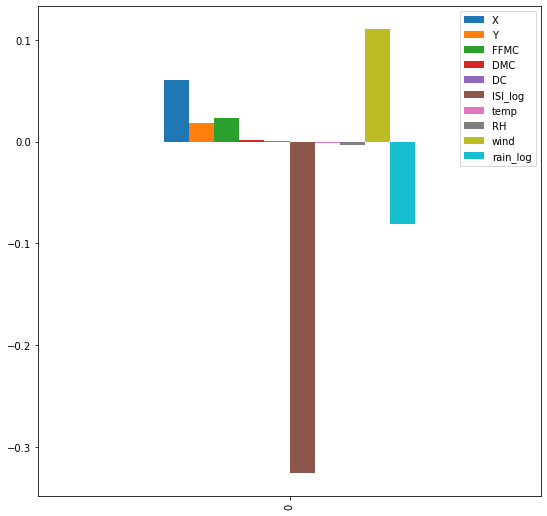

In [33]:
def coeficient_importance(linear_model, columns, excluded_cols=[]):
    coeficients = pd.DataFrame([linear_model.coef_], columns=columns)
    all_other_columns = [col for col in columns if col not in excluded_cols]
    fig, ax = plt.subplots(figsize=(9,9))
    coeficients[all_other_columns].plot.bar(ax=ax)
# coeficient_importance(linreg, poly_features, ['1', 'X', 'Y','FFMC', 'ISI', 'wind', 'temp','RH'])
coeficient_importance(linreg, features)

(MAE) Mean absolute error: 1.22
(MSE) Mean squared error: 2.40
(R2) Coefficient of determination: -0.02


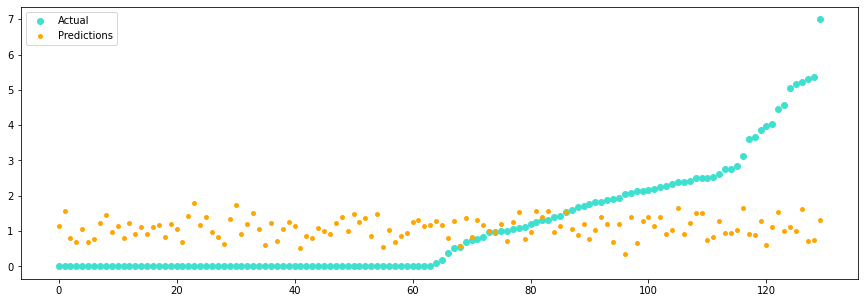

In [34]:
def evaluate(y_test, y_pred):
    print('(MAE) Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
    print('(MSE) Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('(R2) Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    
    a = np.concatenate((y_test.values.reshape(-1,1), y_pred.reshape(-1,1)), axis=1)
    a = a[a[:,0].argsort()]

    fig, ax = plt.subplots(figsize=(15,5))
    x_ticks = range(y_test.shape[0])
    ax.scatter(x_ticks, a[:,0], label='Actual', c='turquoise')
    ax.scatter(x_ticks, a[:,1], label='Predictions', s=15, c='orange');
    ax.legend()
evaluate(y_test, y_pred)

Training Data
(MAE) Mean absolute error: 1.11
(MSE) Mean squared error: 1.75
(R2) Coefficient of determination: 0.04


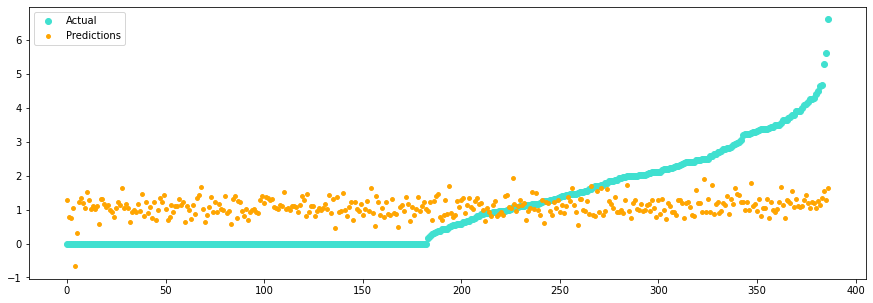

In [35]:
# Evaluata Train Data
print("Training Data")
evaluate(y_train, linreg.predict(X_train))

### SVR

In [36]:
from sklearn.preprocessing import StandardScaler
xscaler = StandardScaler(); x_test_scaler = StandardScaler()
yscaler = StandardScaler(); y_test_scaler = StandardScaler()
X_train_sc = xscaler.fit_transform(X_train)
y_train_sc = yscaler.fit_transform(y_train.values.reshape(-1,1))
X_test_sc = x_test_scaler.fit_transform(X_test)
y_test_sc = y_test_scaler.fit_transform(y_test.values.reshape(-1,1))

In [37]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_sc, y_train_sc.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
y_preds_sc = svr.predict(X_test_sc)
y_preds = y_test_scaler.inverse_transform(y_preds_sc)
y_preds[:10]

array([0.3523863 , 0.34303701, 0.74430828, 0.64945666, 1.05708514,
       0.77663034, 0.92132288, 0.85013706, 0.56793899, 0.88112835])

(MAE) Mean absolute error: 1.10
(MSE) Mean squared error: 2.62
(R2) Coefficient of determination: -0.12


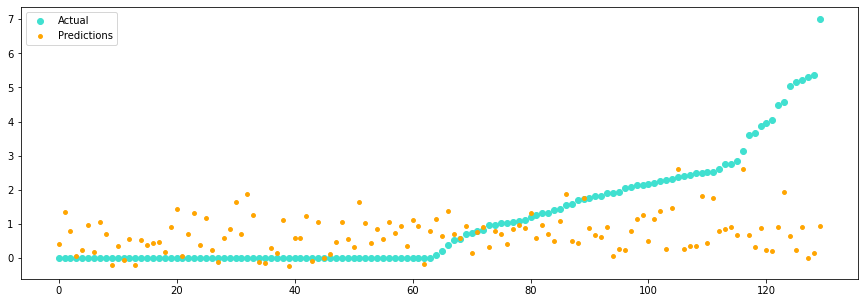

In [39]:
evaluate(y_test, y_preds)

Training Data
(MAE) Mean absolute error: 0.86
(MSE) Mean squared error: 1.59
(R2) Coefficient of determination: 0.13


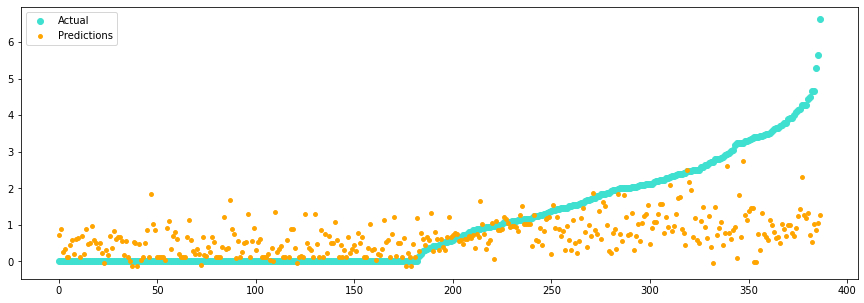

In [40]:
# Evaluata Train Data
print("Training Data")
evaluate(y_train, yscaler.inverse_transform(svr.predict(X_train_sc)))

In [41]:
pd.DataFrame??